In [519]:
import math
import numpy
import matplotlib.pyplot as pyplot

In [520]:
def generalized_polynomial(solution, basis):
    def polynomial(x):
        y = 0
        for coeff, function in zip(solution, basis):
            y += coeff * function(x)
        return y
    return polynomial

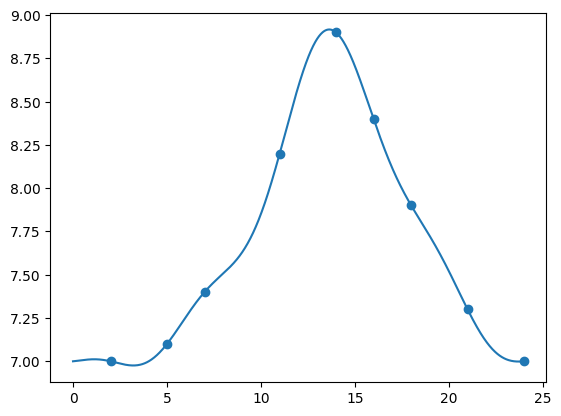

In [521]:
xcoords = numpy.array([2, 5, 7, 11, 14, 16, 18, 21, 24])
ycoords = numpy.array([7, 7.1, 7.4, 8.2, 8.9, 8.4, 7.9, 7.3, 7])
period = 24

def fourier_basis(degree, period):
    basis = numpy.array([lambda x: 1])
    for k in range(1, degree + 1):
            basis = numpy.append(basis, lambda x, k=k: numpy.cos(2 * numpy.pi / period * k * x))
            basis = numpy.append(basis, lambda x, k=k: numpy.sin(2 * numpy.pi / period * k * x))
    return basis

basis = fourier_basis(4, period)
matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xcoords])
solution = numpy.linalg.solve(matrix, ycoords)

xaxis = numpy.linspace(0, period, 1000)
pyplot.plot(xaxis, generalized_polynomial(solution, basis)(xaxis))
pyplot.scatter(xcoords, ycoords)
pyplot.show()

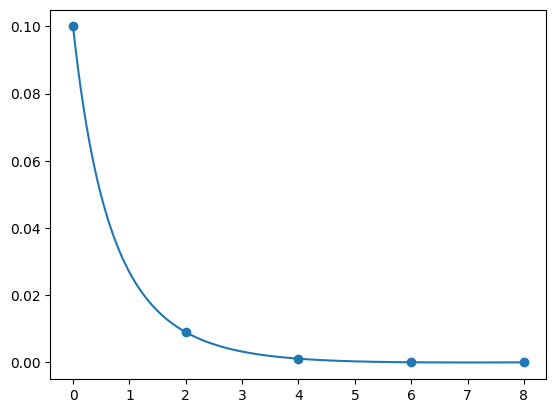

In [522]:
xcoords = numpy.array([0, 2, 4, 6, 8])
ycoords = numpy.array([0.1, 0.009, 0.0011, 0.00003, 0.0000012])

basis = numpy.array([lambda x, k=k: 1 / (1 + k + x) for k in range(5)])
matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xcoords])
solution = numpy.linalg.solve(matrix, ycoords)

xaxis = numpy.linspace(xcoords.min(), xcoords.max(), 1000)
pyplot.plot(xaxis, generalized_polynomial(solution, basis)(xaxis))
pyplot.scatter(xcoords, ycoords)
pyplot.show()

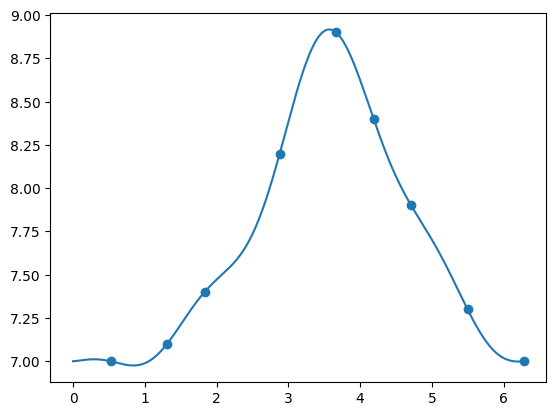

In [523]:
# period of 2 * pi
def interpolate(xcoords, ycoords):
    def polynomial(x):
        y = 0
        for xk, yk in zip(xcoords, ycoords):
            yi = 1
            for xi in xcoords:
                if xi != xk:
                    yi *= numpy.sin((x - xi) / 2) / numpy.sin((xk - xi) / 2)
            y += yi * yk
        return y
    return polynomial

xcoords = numpy.array([2, 5, 7, 11, 14, 16, 18, 21, 24])
ycoords = numpy.array([7, 7.1, 7.4, 8.2, 8.9, 8.4, 7.9, 7.3, 7])
period = 24

xcoords = numpy.array([2 * numpy.pi / period * x for x in xcoords]) # stretch nodes by 2 * pi / period

xaxis = numpy.linspace(0, 2 * numpy.pi, 1000)
pyplot.plot(xaxis, interpolate(xcoords, ycoords)(xaxis))
pyplot.scatter(xcoords, ycoords)
pyplot.show()

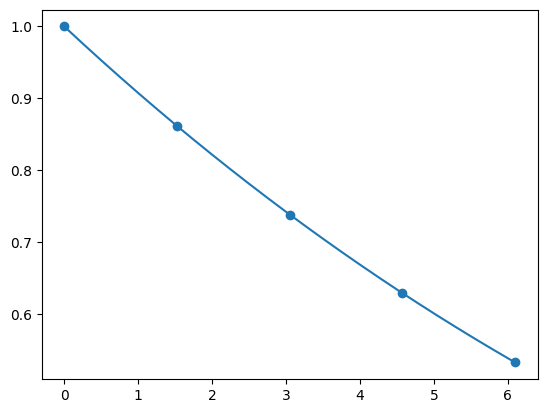

p = 0.742312933103883


In [524]:
# Zadacha 1.

def interpolate(xcoords, ycoords):
    def polynomial(x):
        y = 0
        for xk, yk in zip(xcoords, ycoords):
            yi = 1
            for xi in xcoords:
                if xi != xk:
                    yi *= (x - xi) / (xk - xi)
            y += yi * yk
        return y
    return polynomial

xcoords = numpy.array([0, 1.525, 3.05, 4.575, 6.1])
ycoords = numpy.array([1, 0.8617, 0.7385, 0.6292, 0.5328])

xaxis = numpy.linspace(xcoords.min(), xcoords.max(), 1000)
pyplot.plot(xaxis, interpolate(xcoords, ycoords)(xaxis))
pyplot.scatter(xcoords, ycoords)
pyplot.show()

print("p =", interpolate(xcoords, ycoords)(3))

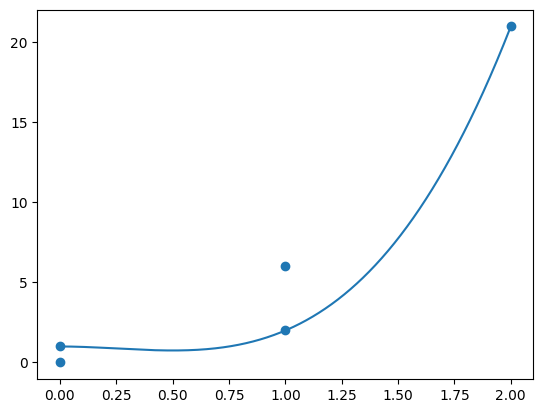

In [525]:
# Zadacha 2.

def divided_difference(xcoords, ycoords, start, count):
    if (xcoords[start] == xcoords[start + count - 1]):
        first = start
        while first > 0:
            if xcoords[first - 1] == xcoords[start]:
                first -= 1
            else:
                break
        return ycoords[first + count - 1] / math.factorial(count - 1)
    else:
        return (divided_difference(xcoords, ycoords, start + 1, count - 1) - divided_difference(xcoords, ycoords, start, count - 1)) / (xcoords[start + count - 1] - xcoords[start])

def interpolate(xcoords, ycoords):
    def polynomial(x):
        y = 0
        multiplier = 1
        for i, xi in enumerate(xcoords):
            y += divided_difference(xcoords, ycoords, 0, i + 1) * multiplier
            multiplier *= x - xi
        return y
    return polynomial

xcoords = numpy.array([0, 0, 1, 1, 2])
ycoords = numpy.array([1, 0, 2, 6, 21])

xaxis = numpy.linspace(xcoords.min(), xcoords.max(), 1000)
pyplot.plot(xaxis, interpolate(xcoords, ycoords)(xaxis))
pyplot.scatter(xcoords, ycoords)
pyplot.show()

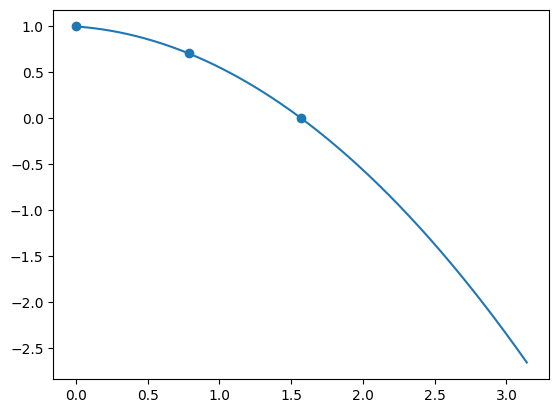

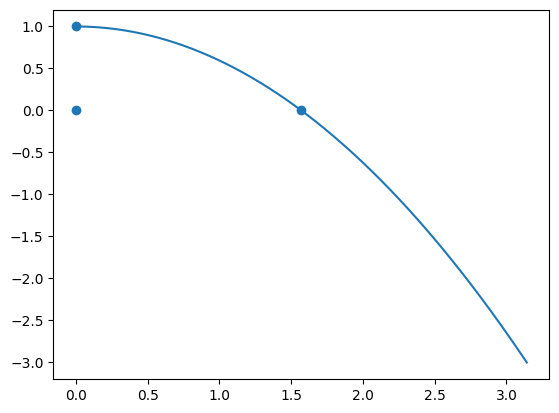

In [526]:
# Zadacha 3.

def divided_difference(xcoords, ycoords, start, count):
    if (xcoords[start] == xcoords[start + count - 1]):
        first = start
        while first > 0:
            if xcoords[first - 1] == xcoords[start]:
                first -= 1
            else:
                break
        return ycoords[first + count - 1] / math.factorial(count - 1)
    else:
        return (divided_difference(xcoords, ycoords, start + 1, count - 1) - divided_difference(xcoords, ycoords, start, count - 1)) / (xcoords[start + count - 1] - xcoords[start])

def interpolate(xcoords, ycoords):
    def polynomial(x):
        y = 0
        multiplier = 1
        for i, xi in enumerate(xcoords):
            y += divided_difference(xcoords, ycoords, 0, i + 1) * multiplier
            multiplier *= x - xi
        return y
    return polynomial

xcoords0 = numpy.array([0, numpy.pi / 4, numpy.pi / 2])
ycoords0 = numpy.cos(xcoords0)

xcoords1 = numpy.array([0, 0, numpy.pi / 2])
ycoords1 = numpy.array([1, 0, 0])

xaxis = numpy.linspace(0, numpy.pi, 1000)
pyplot.plot(xaxis, interpolate(xcoords0, ycoords0)(xaxis))
pyplot.scatter(xcoords0, ycoords0)
pyplot.show()
pyplot.plot(xaxis, interpolate(xcoords1, ycoords1)(xaxis))
pyplot.scatter(xcoords1, ycoords1)
pyplot.show()

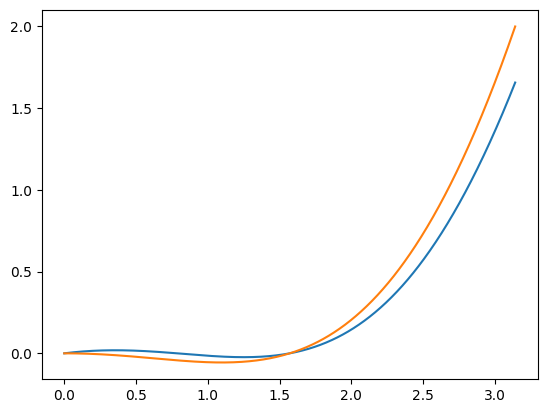

In [527]:
pyplot.plot(xaxis, numpy.cos(xaxis) - interpolate(xcoords0, ycoords0)(xaxis))
pyplot.plot(xaxis, numpy.cos(xaxis) - interpolate(xcoords1, ycoords1)(xaxis))
pyplot.show()

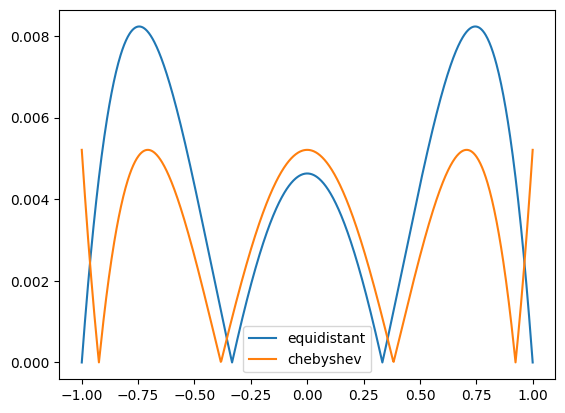

In [528]:
# Zadacha 4.

xcoords0 = numpy.linspace(-1, 1, 4)

def error_estimate0(x):
    error = 1 / math.factorial(len(xcoords0))
    for xi in xcoords0:
        error *= x - xi
    return abs(error)

xcoords1 = numpy.array([numpy.cos((2 * k + 1) / (2 * 4) * numpy.pi) for k in range(4)])

def error_estimate1(x):
    error = 1 / math.factorial(len(xcoords1))
    for xi in xcoords1:
        error *= x - xi
    return abs(error)

xaxis = numpy.linspace(-1, 1, 1000)
pyplot.plot(xaxis, error_estimate0(xaxis))
pyplot.plot(xaxis, error_estimate1(xaxis))
pyplot.legend(['equidistant', 'chebyshev'])
pyplot.show()

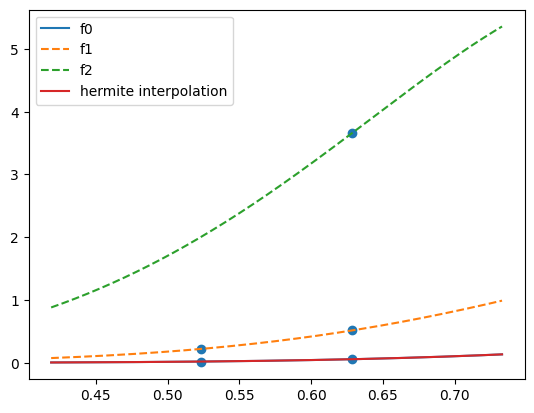

In [529]:
# Zadacha 5.

def divided_difference(xcoords, ycoords, start, count):
    if (xcoords[start] == xcoords[start + count - 1]):
        first = start
        while first > 0:
            if xcoords[first - 1] == xcoords[start]:
                first -= 1
            else:
                break
        return ycoords[first + count - 1] / math.factorial(count - 1)
    else:
        return (divided_difference(xcoords, ycoords, start + 1, count - 1) - divided_difference(xcoords, ycoords, start, count - 1)) / (xcoords[start + count - 1] - xcoords[start])

def interpolate(xcoords, ycoords):
    def polynomial(x):
        y = 0
        multiplier = 1
        for i, xi in enumerate(xcoords):
            y += divided_difference(xcoords, ycoords, 0, i + 1) * multiplier
            multiplier *= x - xi
        return y
    return polynomial

def f0(x):
    return numpy.sin(x ** 2) ** 3

def f1(x):
    return 6 * x * numpy.cos(x ** 2) * (numpy.sin(x ** 2) ** 2)

def f2(x):
    return -12 * (x ** 2) * (numpy.sin(x ** 2) ** 3) + 6 * numpy.cos(x ** 2) * (numpy.sin(x ** 2) ** 2) + 24 * (x ** 2) * (numpy.cos(x ** 2) ** 2   ) * numpy.sin(x ** 2)

xcoords = numpy.array([numpy.pi / 6, numpy.pi / 6, numpy.pi / 5, numpy.pi / 5, numpy.pi / 5])
ycoords = numpy.array([f0(numpy.pi / 6), f1(numpy.pi / 6), f0(numpy.pi / 5), f1(numpy.pi / 5), f2(numpy.pi / 5)])

side = xcoords.max() - xcoords.min()
xaxis = numpy.linspace(xcoords.min() - side, xcoords.max() + side, 1000)
pyplot.plot(xaxis, f0(xaxis))
pyplot.plot(xaxis, f1(xaxis), linestyle='--')
pyplot.plot(xaxis, f2(xaxis), linestyle='--')
pyplot.plot(xaxis, interpolate(xcoords, ycoords)(xaxis))
pyplot.legend(['f0', 'f1', 'f2', 'hermite interpolation'])
pyplot.scatter(xcoords, ycoords)
pyplot.show()

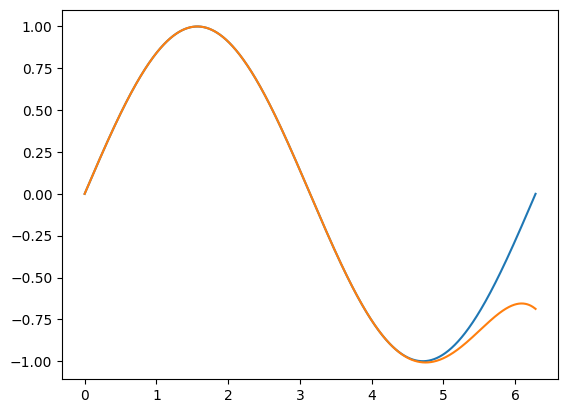

In [530]:
# Zadacha 6.

def interpolate(xcoords, ycoords):
    def polynomial(x):
        y = 0
        for xk, yk in zip(xcoords, ycoords):
            yi = 1
            for xi in xcoords:
                if xi != xk:
                    yi *= (x - xi) / (xk - xi)
            y += yi * yk
        return y
    return polynomial

def lagrange_polynomial(degree, x0, step, function):
    xcoords = numpy.linspace(x0, x0 + degree * step, degree)
    ycoords = function(xcoords)
    return interpolate(xcoords, ycoords)

xaxis = numpy.linspace(0, 2 * numpy.pi, 1000)
pyplot.plot(xaxis, numpy.sin(xaxis))
pyplot.plot(xaxis, lagrange_polynomial(8, 0, numpy.pi / 6, numpy.sin)(xaxis))
pyplot.show()

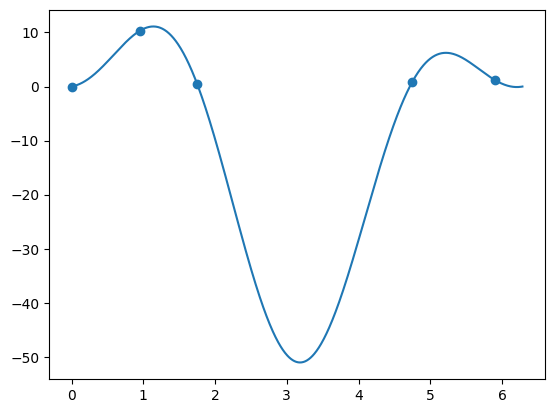

In [531]:
# Zadacha 7.

def generalized_polynomial(solution, basis):
    def polynomial(x):
        y = 0
        for coeff, function in zip(solution, basis):
            y += coeff * function(x)
        return y
    return polynomial

xcoords = numpy.array([0, 0.95, 1.75, 4.75, 5.9])
ycoords = numpy.array([0, 10.3, 0.5, 0.9, 1.2])
period = 2 * numpy.pi

def fourier_basis(degree, period):
    basis = numpy.array([lambda x: 1])
    for k in range(1, degree + 1):
            basis = numpy.append(basis, lambda x, k=k: numpy.cos(2 * numpy.pi / period * k * x))
            basis = numpy.append(basis, lambda x, k=k: numpy.sin(2 * numpy.pi / period * k * x))
    return basis

basis = fourier_basis(2, period)
#basis = numpy.array([lambda x, k=k: x ** k for k in range(5)])
#basis = numpy.array([lambda x, k=k: numpy.e ** (k * x) for k in range(5)])
#basis = numpy.array([lambda x, k=k: numpy.e ** (-1 * k * x) for k in range(5)])

matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xcoords])
solution = numpy.linalg.solve(matrix, ycoords)

xaxis = numpy.linspace(0, period, 1000)
pyplot.plot(xaxis, generalized_polynomial(solution, basis)(xaxis))
pyplot.scatter(xcoords, ycoords)
pyplot.show()

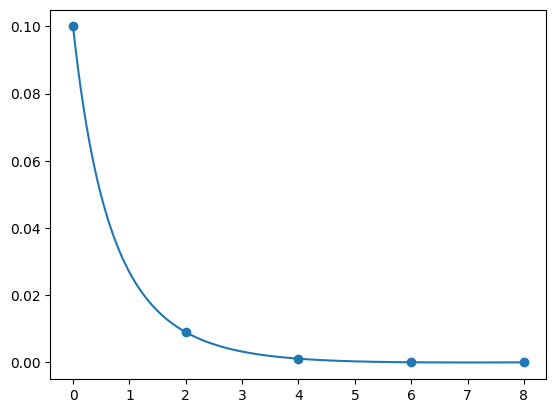

In [532]:
# Zadacha 8.

def generalized_polynomial(solution, basis):
    def polynomial(x):
        y = 0
        for coeff, function in zip(solution, basis):
            y += coeff * function(x)
        return y
    return polynomial

xcoords = numpy.array([0, 2, 4, 6, 8])
ycoords = numpy.array([0.1, 0.009, 0.0011, 0.00003, 0.0000012])

#basis = numpy.array([lambda x, k=k: x ** k for k in range(5)])
#basis = numpy.array([lambda x, k=k: numpy.e ** (k * x) for k in range(5)])
#basis = numpy.array([lambda x, k=k: numpy.e ** (-1 * k * x) for k in range(5)])
basis = numpy.array([lambda x, k=k: 1 / (k + 1 + x) for k in range(5)])
#basis = numpy.array([lambda x, k=k: 1 / (k + 1 - x) for k in range(5)])
matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xcoords])
solution = numpy.linalg.solve(matrix, ycoords)

xaxis = numpy.linspace(xcoords.min(), xcoords.max(), 1000)
pyplot.plot(xaxis, generalized_polynomial(solution, basis)(xaxis))
pyplot.scatter(xcoords, ycoords)
pyplot.show()